## Load The Data

In [13]:
import spacy
nlp = spacy.load('pl_core_news_sm')

In [14]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv("colocates.csv", parse_dates= ['date'])
df.colocate = df.colocate.apply(lambda colocate: " ".join([token.lemma_ for token in nlp(colocate)]) )
df.head()

,text_id,date,source,colocate,id
0,111,2021-02-21,DoRzeczy,twierdzić niezbędny żeby przeciwstawić się z...,0
1,156,2021-02-28,DoRzeczy,fałszywa alarm jak panik wokół zmiana klimat k...,1
2,156,2021-02-28,DoRzeczy,klimatyść tak jak model koszt zmiana klimatycz...,2
3,156,2021-02-28,DoRzeczy,2030 rok aby rozwiązać problem zmiana klimat...,3
4,156,2021-02-28,DoRzeczy,trzeba by zrobić żeby utrzymać zmiana klimatyc...,4


In [15]:
df.colocate

0        twierdzić   niezbędny żeby przeciwstawić się z...
1        fałszywa alarm jak panik wokół zmiana klimat k...
2        klimatyść tak jak model koszt zmiana klimatycz...
3        2030 rok   aby rozwiązać problem zmiana klimat...
4        trzeba by zrobić żeby utrzymać zmiana klimatyc...
                               ...                        
11951    z stan środowisko naturalny więc zmiana klimat...
11952    sektor i obszar wrażliwy na zmiana klimat do r...
11953    przyroda dlaczego dziś nie łapiemy zmiana klim...
11954    pseudonauka z życie codzienny kwestionować zmi...
11955    narciarski zdawać się nie przejmować zmiana kl...
Name: colocate, Length: 11956, dtype: object

In [2]:
df['word'] = df.colocate.str.split(" ")
df = df.explode('word')
df.drop('colocate', inplace=True, axis=1)
df.head()

,text_id,date,source,id,word
0,111,2021-02-21,DoRzeczy,0,twierdzą
0,111,2021-02-21,DoRzeczy,0,
0,111,2021-02-21,DoRzeczy,0,niezbędne
0,111,2021-02-21,DoRzeczy,0,żeby
0,111,2021-02-21,DoRzeczy,0,przeciwstawić


In [3]:
window_width = 6 * 30 # 6 months
time_step = 3 * 30 # 3 months

start_date = df.date.min()
end_date = start_date + datetime.timedelta(days=window_width)
max_date = df.date.max()

df['window_group'] = None
index = 0
dates = []
while start_date < max_date:
    df.loc[df.date.between(start_date, end_date), 'window_group'] = index
    end_date += datetime.timedelta(days=time_step)
    start_date += datetime.timedelta(days=time_step)
    dates.append(start_date + datetime.timedelta(days=window_width/2))
    index += 1
    
print(f"{index + 1} windows created")

34 windows created


In [4]:
n_words =len(df['word'].unique())
print(f"Number of unique words: {n_words}")

Number of unique words: 15492


In [6]:
list(df['word'].unique())

['twierdzą',
 '',
 'niezbędne',
 'żeby',
 'przeciwstawić',
 'się',
 'zmianom',
 'klimatu',
 'jednocześnie',
 'finansowo',
 'do',
 'udźwignięcia',
 'przez',
 'fałszywy',
 'alarm',
 'jak',
 'panika',
 'wokół',
 'zmiany',
 'kosztuje',
 'nas',
 'biliony',
 'uderza',
 'w',
 'klimatyści',
 'tak',
 'model',
 'kosztów',
 'zmian',
 'klimatycznych',
 'prof',
 'williama',
 'nordhausa',
 'z',
 'uniwersytetu',
 '2030',
 'r',
 'aby',
 'rozwiązać',
 'problem',
 'mówi',
 'nauka',
 'ale',
 'to',
 'trzeba',
 'by',
 'zrobić',
 'utrzymać',
 'klimatyczne',
 'poniżej',
 'niemal',
 'niemożliwe',
 'go',
 'samochodów',
 'przypadku',
 'walki',
 'ze',
 'zmianami',
 'oznacza',
 'zaś',
 'absurdalnie',
 'wysokie',
 'koszty',
 'środki',
 'na',
 'rzecz',
 'klimatycznymi',
 'osiągniemy',
 'punkt',
 'bez',
 'odwrotu',
 'zresztą',
 'przypomina',
 'autor',
 'fałszywego',
 'alarmu',
 'zmiana',
 'może',
 'nieść',
 'sobą',
 'nie',
 'wspólnego',
 'koronawirusem',
 'i',
 'ma',
 'równość',
 'kobiet',
 'o',
 'którą',
 'rujnując

# Vector

Text(0, 0.5, 'Number of nodes')

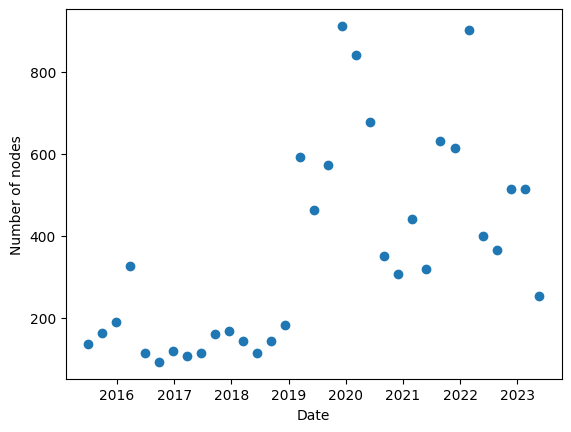

In [5]:
window_nodes_count = df.groupby('window_group').id.unique().apply(len)
plt.scatter(dates, window_nodes_count)
plt.xlabel('Date')
plt.ylabel('Number of nodes')

In [7]:
import seaborn as sns
count_words = df['word'].value_counts()
count_words.describe()

count    15492.000000
mean        10.032791
std        145.404393
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max      12654.000000
Name: word, dtype: float64

Text(0, 0.5, 'Count')

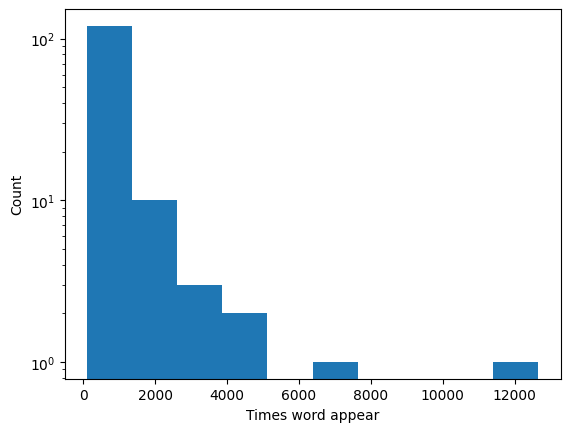

In [12]:
plt.hist(count_words[count_words > 100])
plt.yscale('log')
plt.xlabel('Times word appear')
plt.ylabel('Count')

# Colocates By Score

In [13]:
# Todo: LogDice

In [14]:
#Todo: MI Score

In [ ]:
#Todo: Delta P

# Selected Colocates into Vector

In [27]:
#Todo: decide what does it mean to colocate with the other word
#Frequency treshold with normalization 